In [392]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt


In [393]:
text = ['Acknowledgement']

# Join all the sentences together and extract the unique characters from the combined sentences
chars = set(''.join(text))

# Creating a dictionary that maps integers to the characters
int2char = dict(enumerate(chars))

# Creating another dictionary that maps characters to integers
char2int = {char: ind for ind, char in int2char.items()}

In [394]:
int2char.items()

dict_items([(0, 'k'), (1, 'e'), (2, 'g'), (3, 'm'), (4, 'o'), (5, 'l'), (6, 't'), (7, 'A'), (8, 'w'), (9, 'n'), (10, 'd'), (11, 'c')])

In [395]:
print(int2char)

{0: 'k', 1: 'e', 2: 'g', 3: 'm', 4: 'o', 5: 'l', 6: 't', 7: 'A', 8: 'w', 9: 'n', 10: 'd', 11: 'c'}


In [396]:
print(char2int)

{'k': 0, 'e': 1, 'g': 2, 'm': 3, 'o': 4, 'l': 5, 't': 6, 'A': 7, 'w': 8, 'n': 9, 'd': 10, 'c': 11}


In [397]:
len(char2int)

12

In [398]:
maxlen = len(max(text, key=len))


In [399]:
##### Creating the  lists that will hold our input and target sequences
input_seq = []
target_seq = []

for i in range(len(text)):
    # Remove the  last character for input sequence
  input_seq.append(text[i][:-1])
    
    # Remove the first character for target sequence
  target_seq.append(text[i][1:])

  print("Input Sequence: {}\nTarget Sequence: {}".format(input_seq[i], target_seq[i]))

Input Sequence: Acknowledgemen
Target Sequence: cknowledgement


In [400]:
for i in range(len(text)):
    input_seq[i] = [char2int[character] for character in input_seq[i]]
    print(input_seq[i])
    target_seq[i] = [char2int[character] for character in target_seq[i]]
    print(target_seq[i])

[7, 11, 0, 9, 4, 8, 5, 1, 10, 2, 1, 3, 1, 9]
[11, 0, 9, 4, 8, 5, 1, 10, 2, 1, 3, 1, 9, 6]


In [401]:
for i in range(len(text)):
    print("Input Sequence: {}\nTarget Sequence: {}".format(input_seq[i], target_seq[i]))

Input Sequence: [7, 11, 0, 9, 4, 8, 5, 1, 10, 2, 1, 3, 1, 9]
Target Sequence: [11, 0, 9, 4, 8, 5, 1, 10, 2, 1, 3, 1, 9, 6]


In [402]:
dict_size = len(char2int)    ##########   Dictionary size :- The number of unique characters that we have in our text 
print(dict_size)
seq_len = maxlen - 1         ##########   The length of the sequences that we are feeding into the model 
print(seq_len)
batch_size = len(text)       ##########   The number of sentences that we defined and are going to feed into the model as a batch
print(batch_size)


12
14
1


In [403]:
dict_size = len(char2int)
seq_len = maxlen - 1
batch_size = len(text)

def one_hot_encode(sequence, dict_size, seq_len, batch_size):
    #######   Creating a multi-dimensional array of zeros with the desired output shape

    
    features = np.zeros((batch_size, seq_len, dict_size), dtype=np.float32)
    print(features)
    
    ######### Replacing the 0 at the relevant character index with a 1 to represent that character


    for i in range(batch_size):
        for u in range(seq_len):
            features[i, u, sequence[i][u]] = 1
    return features

In [404]:
input_seq = one_hot_encode(input_seq, dict_size, seq_len, batch_size)

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [405]:
print(input_seq)

[[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]]


In [406]:

######  we can now move the data from NumPy arrays to PyTorch's very own data structure that is  Torch Tensors.

input_seq = torch.from_numpy(input_seq)  
target_seq = torch.Tensor(target_seq)

In [407]:
#### torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it will return False

is_cuda = torch.cuda.is_available()

###  If we have a GPU available, we will set our device to GPU 
###  but here since training data is so small so i am using only CPU here

if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [408]:

class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        #### Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #### Defining the layers
        ###  RNN Layer

        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)

        ### Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):   ######## defining the forward pass function
        
        batch_size = x.size(0)

        ####### Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        #####  Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden)
        
        ###### Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):    #######  This basically creates a tensor of zeros in the shape of our hidden states.
        ## This method generates the first hidden state of zeros which we will use in the forward pass
        ## We will send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden

In [409]:
# Instantiate the model with hyperparameters
model = Model(input_size=dict_size, output_size=dict_size, hidden_dim=15, n_layers=1)
# We'll also set the model to the device that we defined earlier (default is CPU)
model.to(device)

#### Defining the  hyperparameters

n_epochs =1000  ## number of epochs 
lr=0.002         ## learning rate 


###### Define Loss, Optimizer
############################################### Adam optimizer #####################################


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)  ##### we are using here Adam optimizer 


In [410]:
# Training Run
all_losses = [] ##### initializing list of all_losses to maintain all losses inside it .
ep = []         #### initializing list ep to maintain all the corresponding epochs 
##total_loss = 0 # Reset every plot_every iters

for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() ######  Clears existing gradients from previous epoch
    input_seq.to(device)
    output, hidden = model(input_seq)
    loss = criterion(output, target_seq.view(-1).long())
    loss.backward()     ######## Does backpropagation and calculates gradients
    optimizer.step()    ######### Updates the weights accordingly
    
    
    
    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))
        ep.append(epoch)
        all_losses.append(loss)


Epoch: 10/1000............. Loss: 2.4069
Epoch: 20/1000............. Loss: 2.2912
Epoch: 30/1000............. Loss: 2.1595
Epoch: 40/1000............. Loss: 1.9906
Epoch: 50/1000............. Loss: 1.7830
Epoch: 60/1000............. Loss: 1.5733
Epoch: 70/1000............. Loss: 1.3738
Epoch: 80/1000............. Loss: 1.1856
Epoch: 90/1000............. Loss: 1.0118
Epoch: 100/1000............. Loss: 0.8572
Epoch: 110/1000............. Loss: 0.7244
Epoch: 120/1000............. Loss: 0.6123
Epoch: 130/1000............. Loss: 0.5184
Epoch: 140/1000............. Loss: 0.4399
Epoch: 150/1000............. Loss: 0.3744
Epoch: 160/1000............. Loss: 0.3201
Epoch: 170/1000............. Loss: 0.2752
Epoch: 180/1000............. Loss: 0.2382
Epoch: 190/1000............. Loss: 0.2076
Epoch: 200/1000............. Loss: 0.1823
Epoch: 210/1000............. Loss: 0.1613
Epoch: 220/1000............. Loss: 0.1436
Epoch: 230/1000............. Loss: 0.1287
Epoch: 240/1000............. Loss: 0.1161
E

In [411]:
# This function takes in the model and character as arguments and returns the next character prediction and hidden state
def predict(model, character):
    ##### One-hot encoding our input to fit into the model
    character = np.array([[char2int[c] for c in character]])
    character = one_hot_encode(character, dict_size, character.shape[1], 1)
    character = torch.from_numpy(character)
    character.to(device)
    
    out, hidden = model(character)

    prob = nn.functional.softmax(out[-1], dim=0).data
    
    #### Taking the class with the highest probability score from the output
    char_ind = torch.max(prob, dim=0)[1].item()

    return int2char[char_ind], hidden

In [412]:
##### This  output function takes the desired output length and input characters as arguments and returns the produced word

def output(model, out_len, start):
    model.eval() 

    ##### First off, run through the starting characters
    chars = [ch for ch in start]
    size = out_len - len(chars)
    
    ##### Now pass in the previous characters and get a new one
    for i in range(size):
        char, h = predict(model, chars)
        chars.append(char)

    return ''.join(chars)

In [413]:
output(model, 15, 'A')

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0

'Acknowledgement'

In [414]:
import matplotlib.pyplot as plt 

In [415]:

# plt.plot(all_losses, ep, marker='o')
# plt.xticks(rotation=90)
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.show().

In [416]:
import torch

tensor1 = torch.tensor(all_losses,requires_grad=True)
tensor1 = tensor1.detach().numpy()


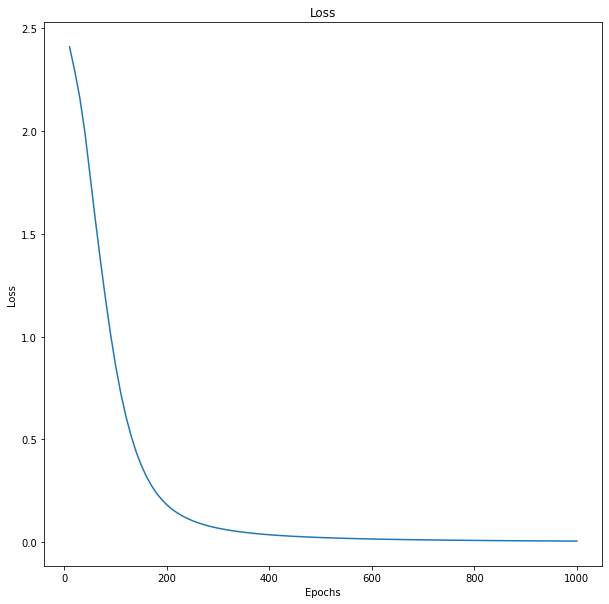

In [417]:

plt.figure(figsize=(10,10))
plt.title("Loss")
plt.plot(ep,tensor1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [418]:
output(model , 8, 'e')

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]
[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0

'ecknowle'